# 공분산 행렬

In [1]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])
z = np.array([3,6,9,12,15])

In [2]:
# covariance
cov_matrix = np.cov([x,y,z])
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 2.5  5.   7.5]
 [ 5.  10.  15. ]
 [ 7.5 15.  22.5]]


# 상관행렬

In [4]:
# correlation coeficient
cor_matrix = np.corrcoef([x,y,z])
print("Correlation Matrix")
print(cor_matrix)

Correlation Matrix
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [5]:
threshold = 0.7

print("Variables with high multicollinearity:")
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[1]):
        if abs(cor_matrix[i, j]) > threshold:
            print(f"Variable {i+1} and Variable {j+1}")

Variables with high multicollinearity:
Variable 1 and Variable 2
Variable 1 and Variable 3
Variable 2 and Variable 3


# 상관 행렬을 사용한 차원 축소 및 데이터 시각화 실습

In [6]:
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
x3 = np.random.normal(0, 1, 100)

data = np.vstack([x1, x2, x3]) .T
cor_matrix = np.corrcoef(data, rowvar=False)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

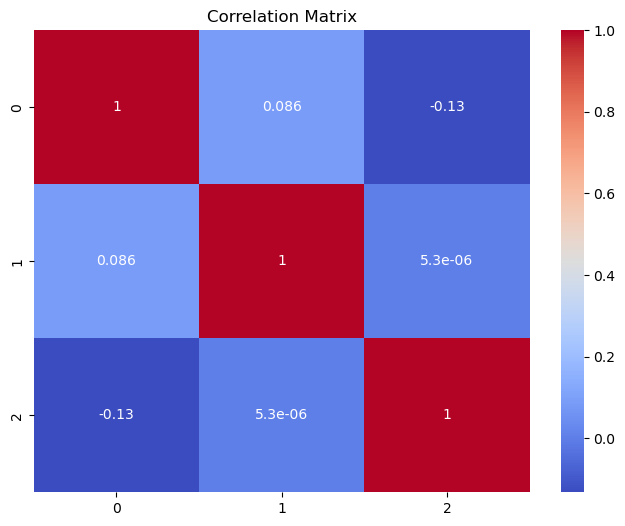

In [9]:
plt.figure(figsize = (8,6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
threshold = 0.1
selected_vars = []
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[1]):
        if abs(cor_matrix[i,j])> threshold:
            selected_vars.extend([i,j])

print(selected_vars)

[0, 2]


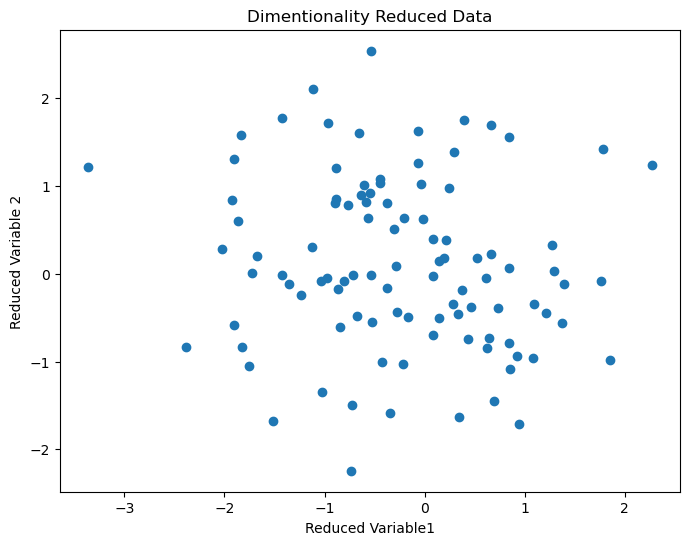

In [16]:
if selected_vars:
    reduced_data = data[:, list(set(selected_vars))]

    plt.figure(figsize=(8,6))
    plt.scatter(reduced_data[:,0], reduced_data[:,1])
    plt.xlabel('Reduced Variable1')
    plt.ylabel('Reduced Variable 2')
    plt.title('Dimentionality Reduced Data')
    plt.show()
else:
    print('데이터셋에서 선택된 변수가 없어 차원 축소가 이루어지지 않았음.empty list')
